In [1]:
# Logistic Regression Application

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
veri=pd.read_csv('data.csv')

In [3]:
plt.style.use("seaborn-pastel")

In [4]:
veri.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:xlabel='target', ylabel='count'>

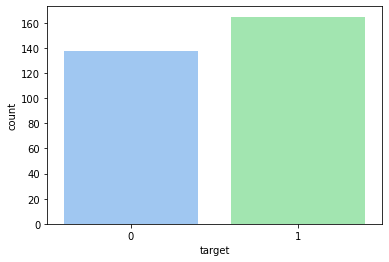

In [6]:
sns.countplot(x="target",data=veri)

In [7]:
# column chart for sick/healthy

hasta_cns=pd.crosstab(veri["target"],veri["sex"])
hasta_cns


sex,0,1
target,,
0,24,114
1,72,93


Text(0, 0.5, 'kişi sayısı')

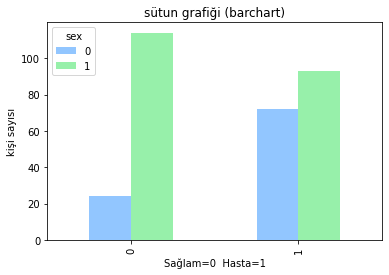

In [8]:
#  sick/well column chart

hasta_cns.plot.bar()
plt.title("sütun grafiği (barchart)")
plt.xlabel("Sağlam=0  Hasta=1")
plt.ylabel("kişi sayısı")


<AxesSubplot:xlabel='age', ylabel='Count'>

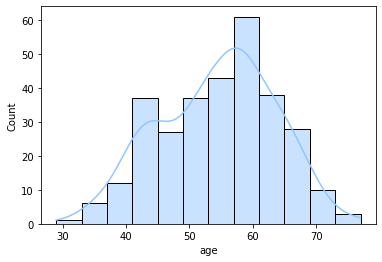

In [9]:
# age distribution

sns.histplot(veri["age"],kde=True)

In [10]:
# age ratios of patients

data_selected=veri[(veri["age"]!=0 ) & (veri["target"] == 1)]
data_selected["age"].value_counts()

54    10
41     9
51     9
52     9
44     8
42     7
57     7
58     7
53     6
45     6
64     6
59     5
43     5
56     5
48     4
62     4
46     4
65     4
66     4
50     4
60     3
71     3
67     3
47     3
49     3
63     3
55     3
39     3
35     2
37     2
68     2
69     2
34     2
38     2
76     1
40     1
74     1
61     1
70     1
29     1
Name: age, dtype: int64

C:\Users\adenon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


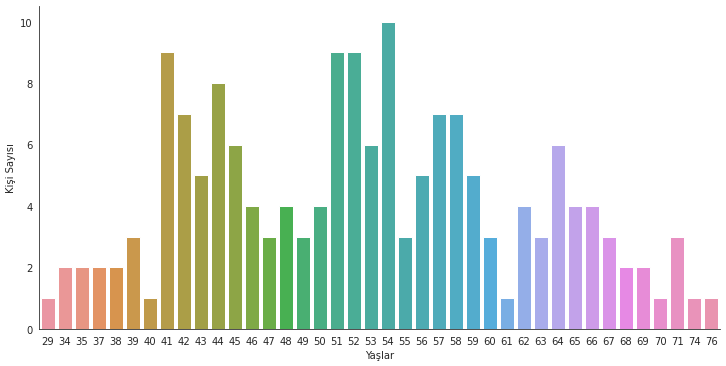

In [11]:
with sns.axes_style("white"):
    g=sns.catplot("age", data=data_selected, aspect=2, kind="count")
    g.set_axis_labels("Yaşlar","Kişi Sayısı")

In [12]:
#  age ratios of patients

X=veri.drop('target',axis=1)

In [13]:
y=veri["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [14]:
# training the model

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
from sklearn.linear_model import LogisticRegression

In [15]:
logmodel=LogisticRegression(max_iter=100)
logmodel.fit(X_train,y_train)

C:\Users\adenon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
logmodel.coef_

array([[-7.16625946e-04, -1.76297924e+00,  1.01740038e+00,
        -2.08829072e-02, -2.68990514e-03, -1.27562538e-02,
         7.67776634e-01,  3.75996761e-02, -9.17922050e-01,
        -6.51052489e-01,  1.96787943e-01, -5.79691186e-01,
        -4.86981415e-01]])

In [17]:
# predictive values for test data

pred=logmodel.predict(X_test)
pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [18]:
# see test data

X_test.shape
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[20, 10],
       [ 4, 27]], dtype=int64)

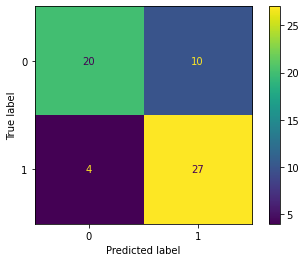

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logmodel,X_test,y_test)

In [21]:
# report

from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [22]:
cm=confusion_matrix(y_test,pred)
cm

array([[20, 10],
       [ 4, 27]], dtype=int64)

In [23]:
(cm[0][0]+cm[1][1]) / X_test.shape[0]

0.7704918032786885

In [24]:
cm[0][0]/(cm[0][0]+cm[1][0])

0.8333333333333334

In [25]:
cm[1][1]/(cm[1][1]+cm[0][1])

0.7297297297297297

In [26]:
cm[0][0] / (cm[0][0]+cm[0][1])

0.6666666666666666